In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
history_df = pd.read_csv("data/web_browsing.csv", header=None)

In [3]:
history_df.columns = ["userid", "id", "from_visit", "place_id", "visit_date", "visit_type", "session", "userid_int"]

In [4]:
history_df["userindex"] = pd.factorize(history_df.userid)[0]

In [5]:
history_df

,userid,id,from_visit,place_id,visit_date,visit_type,session,userid_int,userindex
0,60125070-CE3E-B11C-A07D-CE3FB56169E3,240483,0,217459,1285109685468000,1,242349611621323260,300,0
1,60125070-CE3E-B11C-A07D-CE3FB56169E3,240482,0,217458,1285109673421000,1,242349611621323230,300,0
2,60125070-CE3E-B11C-A07D-CE3FB56169E3,240481,0,217457,1285109655656000,1,242349611621323230,300,0
3,60125070-CE3E-B11C-A07D-CE3FB56169E3,240480,0,217456,1285109642500000,1,242349611621323230,300,0
4,60125070-CE3E-B11C-A07D-CE3FB56169E3,240479,0,217455,1285109624187000,1,242349611621323230,300,0
...,...,...,...,...,...,...,...,...,...
5155144,6497AED3-3C26-041D-0135-E97C2E1D8DFB,25001,25000,18433,1400938133888341,1,0,539,508
5155145,6497AED3-3C26-041D-0135-E97C2E1D8DFB,25002,25001,18434,1400938142105439,1,0,539,508
5155146,6497AED3-3C26-041D-0135-E97C2E1D8DFB,25003,24999,18435,1400938382081507,1,0,539,508
5155147,6497AED3-3C26-041D-0135-E97C2E1D8DFB,25004,25003,18436,1400938382671593,5,0,539,508


In [6]:
history_df.userid.unique().shape

(524,)

In [116]:
user_list = history_df['userindex'].drop_duplicates().to_list()

In [117]:
DF_user_list = []
for user in user_list:
    DF_user_list.append(history_df[history_df['userindex'] == user].reset_index())

In [118]:
artist_track_set = []
length_set = []
all_length_set = []
proportion_set = []
user_length_dict = []

for i in range(len(user_list)):
    temp_artist_track_set = DF_user_list[i]['place_id'].iloc[DF_user_list[i]['place_id'].astype(str).drop_duplicates().index]
    length_set.append(temp_artist_track_set.shape[0])
    all_length_set.append(temp_artist_track_set.index[-1] + 1)
    
    temp_dict = {k:temp_artist_track_set.index[k] for k in range(temp_artist_track_set.shape[0])}
    temp_df = pd.DataFrame(temp_dict.items(), columns=['d_t', 't'])
    
    user_length_dict.append(temp_df)
    
    proportion_set.append(temp_artist_track_set.shape[0]/(temp_artist_track_set.index[-1] + 1))
    artist_track_set.append(temp_artist_track_set)

In [119]:
length_set = np.array(length_set)
all_length_set = np.array(all_length_set)
proportion_set = np.array(proportion_set)

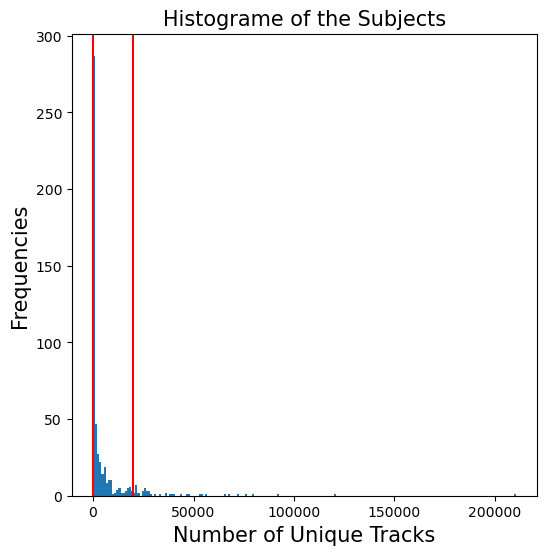

In [120]:
fig, ax = plt.subplots(figsize=(6,6))
plt.hist(length_set,bins = 200)

plt.axvline(x=20, color="r")
plt.axvline(x=20000, color="r")

plt.xlabel("Number of Unique Tracks", fontsize=15)
plt.ylabel("Frequencies", fontsize=15)
plt.title("Histograme of the Subjects", fontsize=15)
plt.show()

In [ ]:
user_list = np.array(user_list)[(length_set > 20) & (length_set < 20000) & (proportion_set < 0.975) & (proportion_set > 0.025)]

In [122]:
print(((length_set <= 20)|(length_set >= 20000)).sum())
print((length_set <= 20).sum())
print((proportion_set >= 0.975).sum())
print((proportion_set <= 0.025).sum())

48
1
11
1


In [123]:
len(user_list)

465

In [124]:
DF_user_list = []
for user in user_list:
    DF_user_list.append(history_df[history_df['userindex'] == user].reset_index())

In [125]:
preprocessed_df = pd.concat(DF_user_list)

In [126]:
preprocessed_df

,index,userid,id,from_visit,place_id,visit_date,visit_type,session,userid_int,userindex
0,496,0DEAFABC-DB8E-36EC-92C8-AB0BC6365840,175,174,246,1288947457000000,1,1,18,1
1,497,0DEAFABC-DB8E-36EC-92C8-AB0BC6365840,174,140,245,1288947440578000,1,1,18,1
2,498,0DEAFABC-DB8E-36EC-92C8-AB0BC6365840,173,0,244,1288947437312000,1,12,18,1
3,499,0DEAFABC-DB8E-36EC-92C8-AB0BC6365840,172,0,243,1288947437312000,1,11,18,1
4,500,0DEAFABC-DB8E-36EC-92C8-AB0BC6365840,171,168,242,1288947366218000,1,1,18,1
...,...,...,...,...,...,...,...,...,...,...
6473,5142476,A93E2FAC-C8BA-4B62-FF3F-E24A4C9779B6,6951,6950,5331,1403167963487000,1,0,559,523
6474,5142477,A93E2FAC-C8BA-4B62-FF3F-E24A4C9779B6,6952,6948,3523,1403168123812000,1,0,559,523
6475,5142478,A93E2FAC-C8BA-4B62-FF3F-E24A4C9779B6,6953,0,5332,1403168134840000,1,0,559,523
6476,5142479,A93E2FAC-C8BA-4B62-FF3F-E24A4C9779B6,6954,0,5332,1403168135501000,1,0,559,523


# Calculate Entropy

In [127]:
from utils import Entropy

In [128]:
entropy = []
entropy_random = []
entropy_uncorrelated = []

history_code_list = []
N = []

for user in user_list:
    history = history_df.loc[history_df.userindex == user]
    N.append(history.shape[0])
    
    history_code = pd.factorize(history.place_id)[0]
    history_code_list.append(pd.factorize(history.place_id)[0])
    
    entropy_random.append(Entropy.rand_entropy(history_code))
    entropy_uncorrelated.append(Entropy.unc_entropy(history_code))
    entropy.append(Entropy.actual_entropy(history_code))

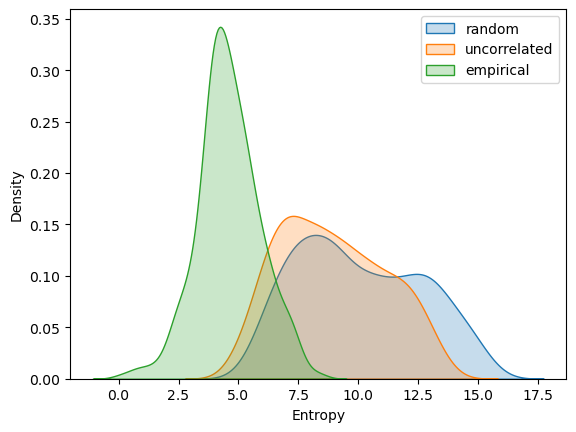

In [129]:
fig, ax = plt.subplots()
sns.kdeplot(entropy_random, label="random",fill="blue", ax=ax)
sns.kdeplot(entropy_uncorrelated, label="uncorrelated",fill="green", ax=ax)
sns.kdeplot(entropy, label="empirical", fill="red", ax=ax)
plt.xlabel("Entropy")
plt.legend()

# Calcualte predicatbility

In [130]:
from utils import Predictability

In [131]:
P_max_list = []
P_max_unc_list = []
P_max_rand_list = []
for i in range(len(entropy)):
    S = entropy[i]
    S_rand = entropy_random[i]
    S_unc = entropy_uncorrelated[i]
    
    n = N[i]
    
    P_max_list.append(Predictability.predictability(S, n))
    P_max_unc_list.append(Predictability.predictability(S_unc, n))
    P_max_rand_list.append(Predictability.predictability(S_rand, n))

In [132]:
P_max_list = np.array(P_max_list)
P_max_unc_list = np.array(P_max_unc_list)
P_max_rand_list = np.array(P_max_rand_list)

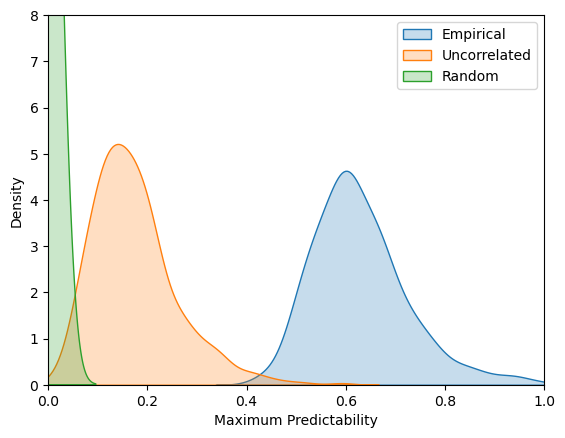

In [133]:
sns.kdeplot(P_max_list, label = "Empirical", fill="red")
sns.kdeplot(P_max_unc_list, label = "Uncorrelated", fill="green")
sns.kdeplot(P_max_rand_list, label = "Random", fill="blue", bw_adjust=20)
plt.xlabel("Maximum Predictability")
plt.ylim(0,8)
plt.xlim(0,1)
plt.legend()

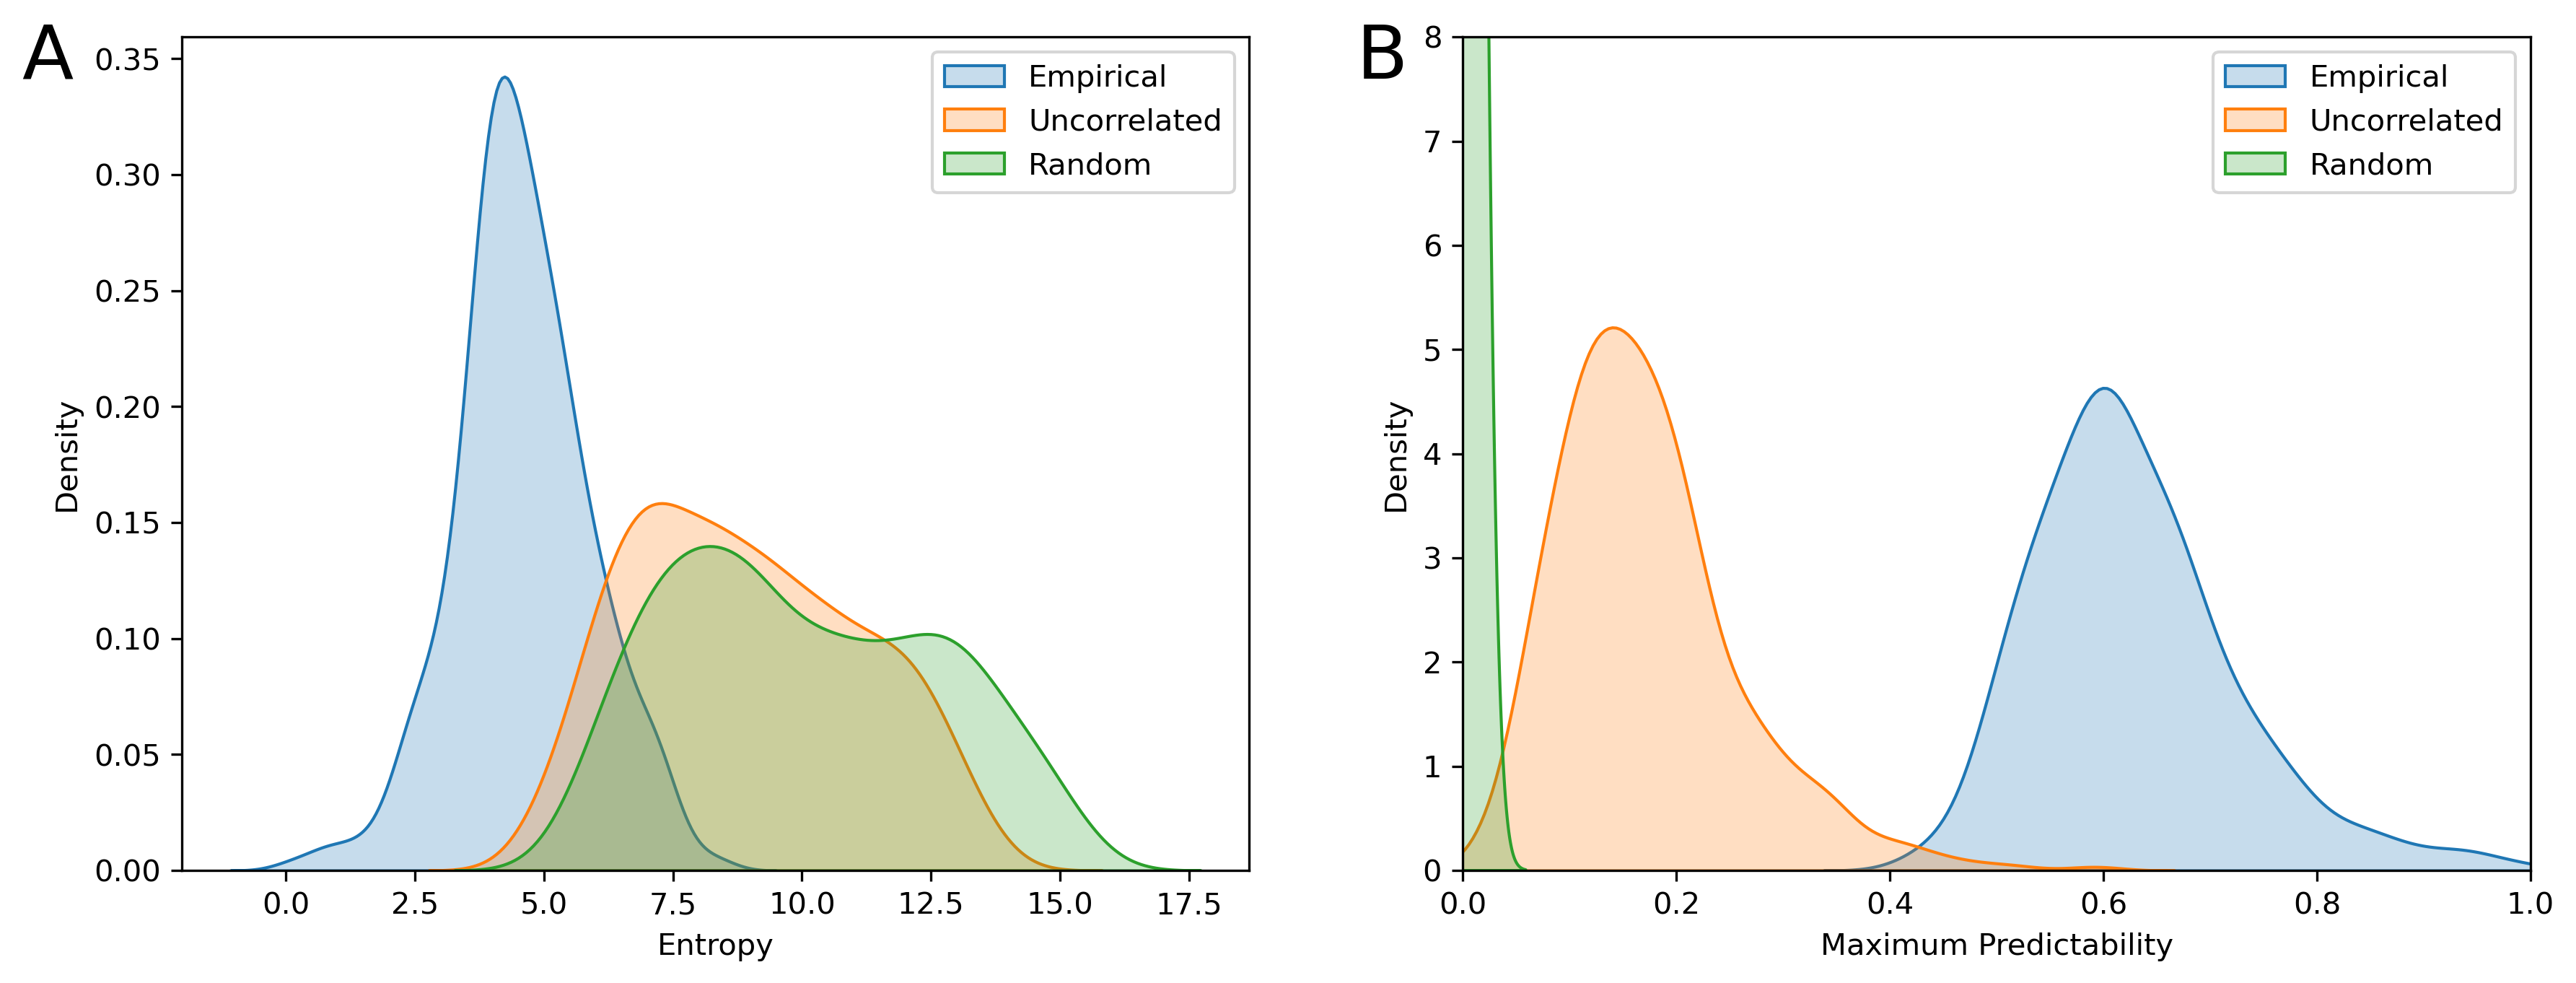

In [152]:
fig, ax = plt.subplots(1,2, figsize=(14,5), dpi=300)

sns.kdeplot(entropy, label="Empirical", fill="red", ax=ax[0])
sns.kdeplot(entropy_uncorrelated, label="Uncorrelated",fill="green", ax=ax[0])
sns.kdeplot(entropy_random, label="Random",fill="blue", ax=ax[0])


ax[0].set_xlabel("Entropy")
ax[0].legend()

sns.kdeplot(P_max_list, label = "Empirical", fill="red", ax=ax[1])
sns.kdeplot(P_max_unc_list, label = "Uncorrelated", fill="green", ax=ax[1])
sns.kdeplot(P_max_rand_list, label = "Random", fill="blue", bw_adjust=10, ax=ax[1])
ax[1].set_xlabel("Maximum Predictability")
ax[1].set_ylim(0,8)
ax[1].set_xlim(0,1)
ax[1].legend()

ax[0].annotate("A", fontsize= 25, xy=(-0.15, 0.95), xycoords="axes fraction")
ax[1].annotate("B", fontsize= 25, xy=(-0.1, 0.95), xycoords="axes fraction")

fig.savefig('entropy_predictability.png', dpi=300)

## Statistical testing of empirical data against null models

In [135]:
print(P_max_list.mean())
print(P_max_list.std())

print(P_max_unc_list.mean())
print(P_max_unc_list.std())

print(P_max_rand_list.mean())
print(P_max_rand_list.std())

0.6283913022778956
0.09579847965253342
0.173145672440929
0.08513921505555005
0.0030718454391907265
0.004230056822370711


In [136]:
import scipy.stats as stats

In [137]:
stats.ttest_rel(P_max_list, P_max_unc_list)

Ttest_relResult(statistic=182.2180670625824, pvalue=0.0)

In [138]:
stats.ttest_rel(P_max_list, P_max_rand_list)

Ttest_relResult(statistic=139.06352502213028, pvalue=0.0)

In [139]:
stats.ttest_rel(P_max_unc_list, P_max_rand_list)

Ttest_relResult(statistic=42.961475696534094, pvalue=8.029622593730164e-164)

# Calculate MC model predictability

In [140]:
import multiprocessing

In [141]:
from utils import Markov

In [142]:
def obtain_ool_accuracy(user):
    history = history_df.loc[history_df.userindex == user]
    sequence = pd.factorize(history.place_id)[0]
    ool_accuracy = Markov.loo_evaluate_accuracy(sequence)
    return ool_accuracy

In [143]:
pool_obj = multiprocessing.Pool(8)

/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/jasongong/anaconda3/lib/python3.7/site

In [144]:
user_list.shape

(465,)

In [145]:
ool_accuracy_list = pool_obj.map(obtain_ool_accuracy, user_list)

In [146]:
ool_accuracy_list = np.array(ool_accuracy_list)
print(ool_accuracy_list.mean())
print(ool_accuracy_list.std())

0.0955380875882692
0.0801550241272899


In [148]:
print((np.array(P_max_list) - np.array(ool_accuracy_list)).mean())
print((np.array(P_max_list) - np.array(ool_accuracy_list)).std())

0.5328532146896264
0.0446565591511308


0.0955380875882692
0.0801550241272899


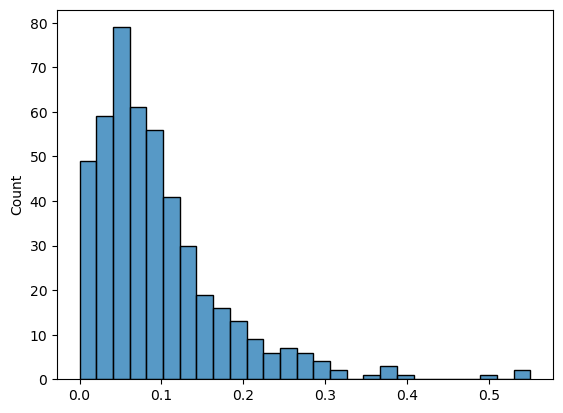

In [154]:
sns.histplot(ool_accuracy_list)
print(np.array(ool_accuracy_list).mean())
print(np.array(ool_accuracy_list).std())

<AxesSubplot:>

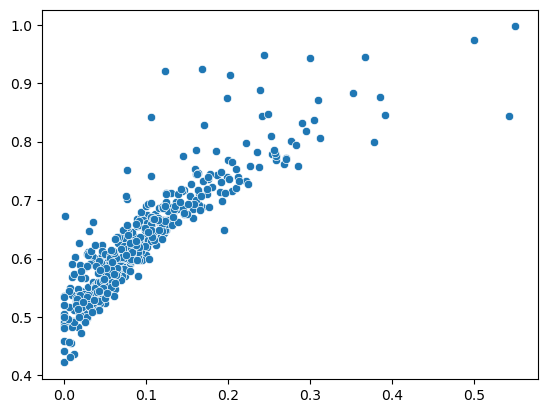

In [150]:
sns.scatterplot(x = ool_accuracy_list, y = P_max_list)


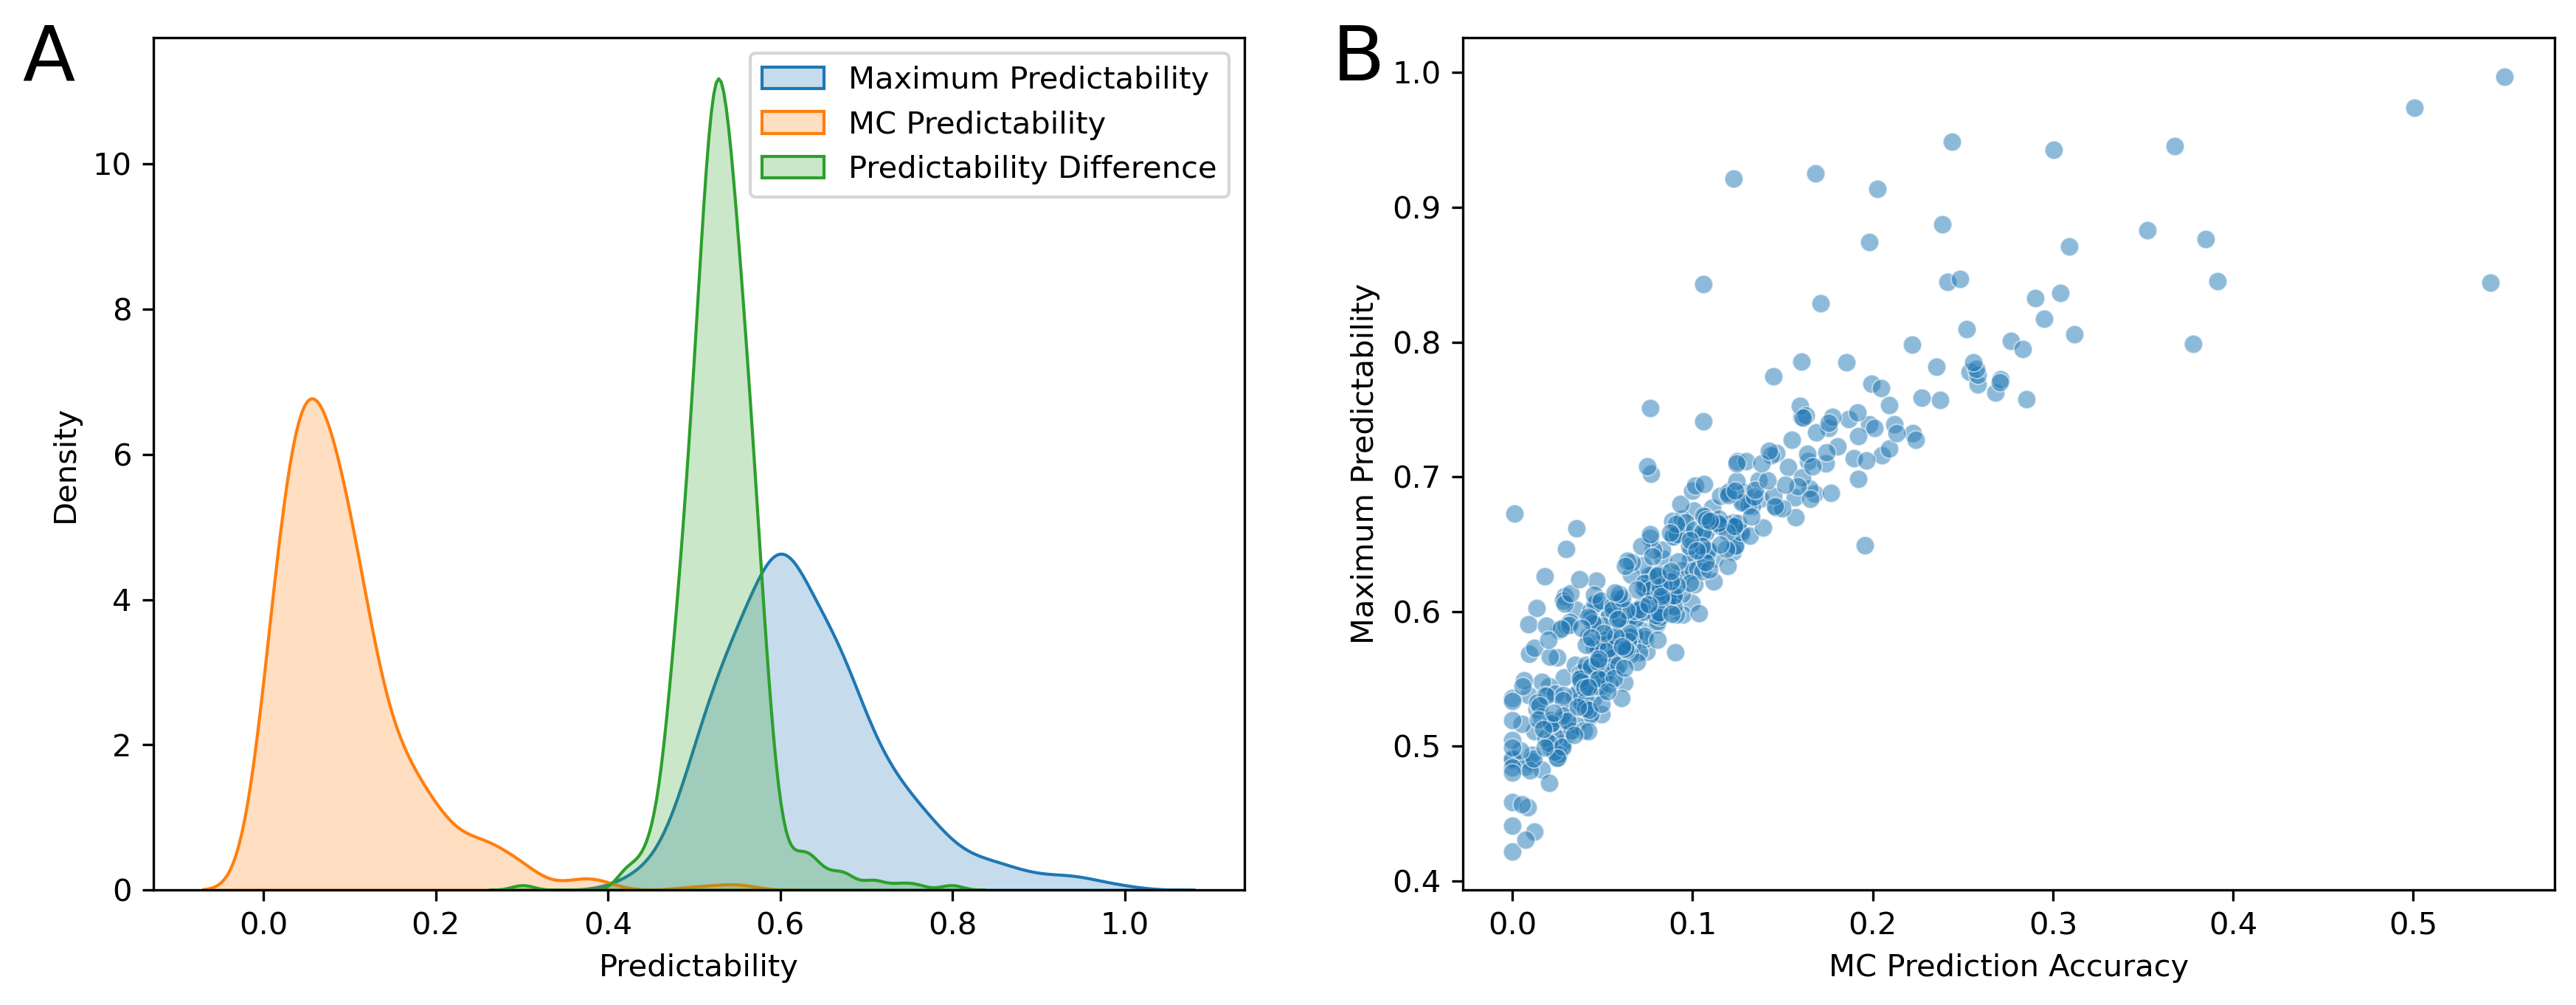

In [153]:
fig, ax = plt.subplots(1,2, figsize=(14,5), dpi=300)

sns.kdeplot(P_max_list, label="Maximum Predictability", fill="red", ax=ax[0])
sns.kdeplot(ool_accuracy_list, label="MC Predictability",fill="green", ax=ax[0])
sns.kdeplot(P_max_list-ool_accuracy_list, label="Predictability Difference",fill="blue", ax=ax[0])
ax[0].set_xlabel("Predictability")
ax[0].legend()

sns.scatterplot(x = ool_accuracy_list, y = P_max_list, alpha=0.5, ax=ax[1])
ax[1].set_xlabel("MC Prediction Accuracy")
ax[1].set_ylabel("Maximum Predictability")

ax[0].annotate("A", fontsize= 25, xy=(-0.12, 0.95), xycoords="axes fraction")
ax[1].annotate("B", fontsize= 25, xy=(-0.12, 0.95), xycoords="axes fraction")

fig.savefig('MC_predictability.png', dpi=300)